# In Depth Study of Failures in Education in India

## Are the conditions of classrooms correlated with failure of education?

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from numpy import linalg
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
metadata = pd.read_csv("2015_16_Districtwise_Metadata.csv")
metadata.head()

,Field Name,Description
0,STATCD,Data_Reported_from: State code
1,DISTCD,Data_Reported_from: District Code
2,STATNAME,Data_Reported_from: State name
3,DISTNAME,Data_Reported_from: District name
4,DISTRICTS,Data_Reported_from: No. of district


In [4]:
data = pd.read_csv("2015_16_Districtwise.csv")
data.head()

,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,...,21322,26,2594,3489,5315,27,62,23,852,239
1,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,...,5444,31,408,817,3284,886,11,0,2873,40
3,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,...,12469,18,857,2290,3837,119,45,8,1035,325
4,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,...,7408,17,855,1688,2584,151,67,5,1101,209


(array([ 36.,  68.,  89., 100.,  89.,  66.,  51.,  33.,  33.,  23.,  15.,
         19.,  15.,   6.,   5.,   6.,   5.,   3.,   3.,   2.,   2.,   3.,
          3.,   3.,   2.]),
 array([0.        , 0.01642388, 0.03284776, 0.04927164, 0.06569552,
        0.08211939, 0.09854327, 0.11496715, 0.13139103, 0.14781491,
        0.16423879, 0.18066267, 0.19708655, 0.21351043, 0.2299343 ,
        0.24635818, 0.26278206, 0.27920594, 0.29562982, 0.3120537 ,
        0.32847758, 0.34490146, 0.36132534, 0.37774921, 0.39417309,
        0.41059697]),
 <a list of 25 Patch objects>)

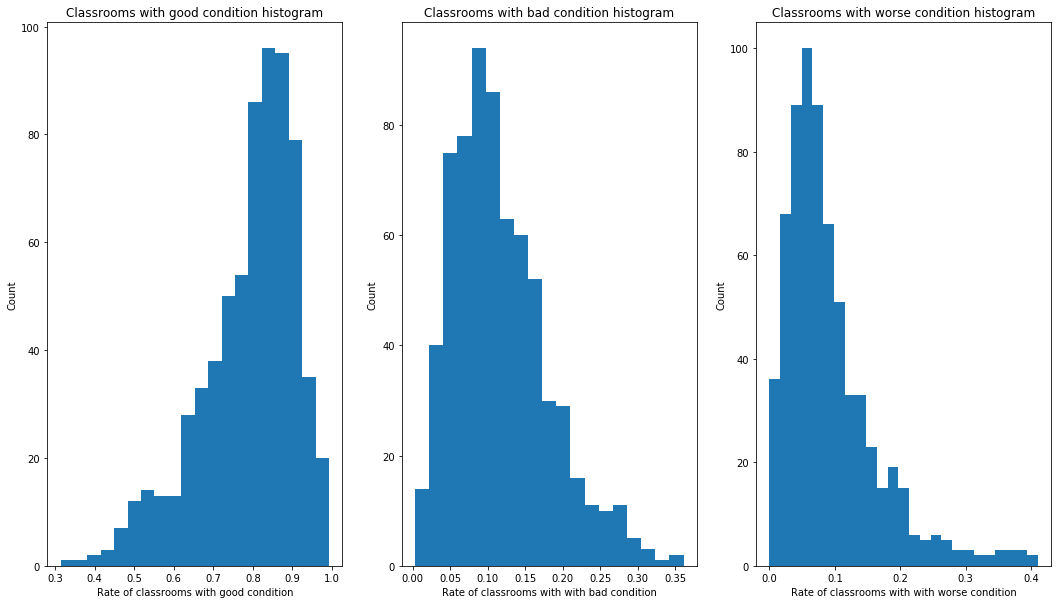

In [28]:
# Get total number of classrooms with a good, bad, and worse condition in each district
classroom_good = ["TOTCLGD%dG" % i for i in np.arange(1, 8)]
classroom_good_data = sum([data[fn] for fn in classroom_good])
classroom_bad = ["TOTCLMI%dG" % i for i in np.arange(1, 8)] # need minor repair
classroom_bad_data = sum([data[fn] for fn in classroom_bad])
classroom_worse = ["TOTCLMJ%dG" % i for i in np.arange(1, 8)] # need major repair
classroom_worse_data = sum([data[fn] for fn in classroom_worse])

# Total number of classrooms
total_cr = data["CLSTOT"]

# rates of good/bad/worse classrooms
crg_rate = classroom_good_data / total_cr
crb_rate = classroom_bad_data / total_cr
crw_rate = classroom_worse_data / total_cr

# plot rates
plt.figure(figsize=(18, 10))

plt.subplot(131)
plt.title("Classrooms with good condition histogram")
plt.xlabel("Rate of classrooms with good condition")
plt.ylabel("Count")
plt.hist(crg_rate, bins="auto")

plt.subplot(132)
plt.title("Classrooms with bad condition histogram")
plt.xlabel("Rate of classrooms with with bad condition")
plt.ylabel("Count")
plt.hist(crb_rate, bins="auto")

plt.subplot(133)
plt.title("Classrooms with worse condition histogram")
plt.xlabel("Rate of classrooms with with worse condition")
plt.ylabel("Count")
plt.hist(crw_rate, bins="auto")

(array([245., 107.,  68.,  49.,  43.,  29.,  25.,  28.,  21.,  12.,  11.,
          5.,   8.,   6.,   3.,   4.,   3.,   3.,   5.,   1.,   1.,   3.]),
 array([0.        , 0.00145668, 0.00291336, 0.00437003, 0.00582671,
        0.00728339, 0.00874007, 0.01019674, 0.01165342, 0.0131101 ,
        0.01456678, 0.01602346, 0.01748013, 0.01893681, 0.02039349,
        0.02185017, 0.02330685, 0.02476352, 0.0262202 , 0.02767688,
        0.02913356, 0.03059023, 0.03204691]),
 <a list of 22 Patch objects>)

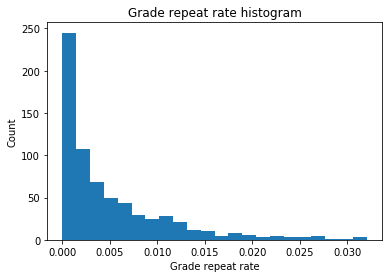

In [29]:
# Get total number of repeaters in each district
repeaters = ["C%d_%sR" % (i, s) for s in ["B", "G"] for i in np.arange(1, 10)]
repeaters_data = sum([data[fn] for fn in repeaters]) # total number of repeaters by district

# Get total enrollment
total_enroll = ["ENRTOT", "ENRTOTG", "ENRTOTP", "ENRTOTM"]
total_enroll_data = sum([data[fn] for fn in total_enroll]) # total enrolment by district

# Repeat rate is the total number of repeats / total number of enrollment
rep_rate = repeaters_data / total_enroll_data

plt.figure()
plt.title("Grade repeat rate histogram")
plt.xlabel("Grade repeat rate")
plt.ylabel("Count")
plt.hist(rep_rate, bins="auto")

Good classroom vs repeaters
a = -0.010419195744246417
b = 0.013277926774233409
R^2 = 0.04347751800193013
p-value = 4.07036647404431e-08
std. error = 0.0018768716287867937

Bad classroom vs repeat rate
a = 0.024656047581379067
b = 0.0021572737130373314
R^2 = 0.06733208652703454
p-value = 6.325315086189878e-12
std. error = 0.003524204440959732

Worse classroom vs repeaters
a = 0.010375593904163398
b = 0.004078200031095058
R^2 = 0.015255590064973193
p-value = 0.0012497390249312022
std. error = 0.003201440062542447


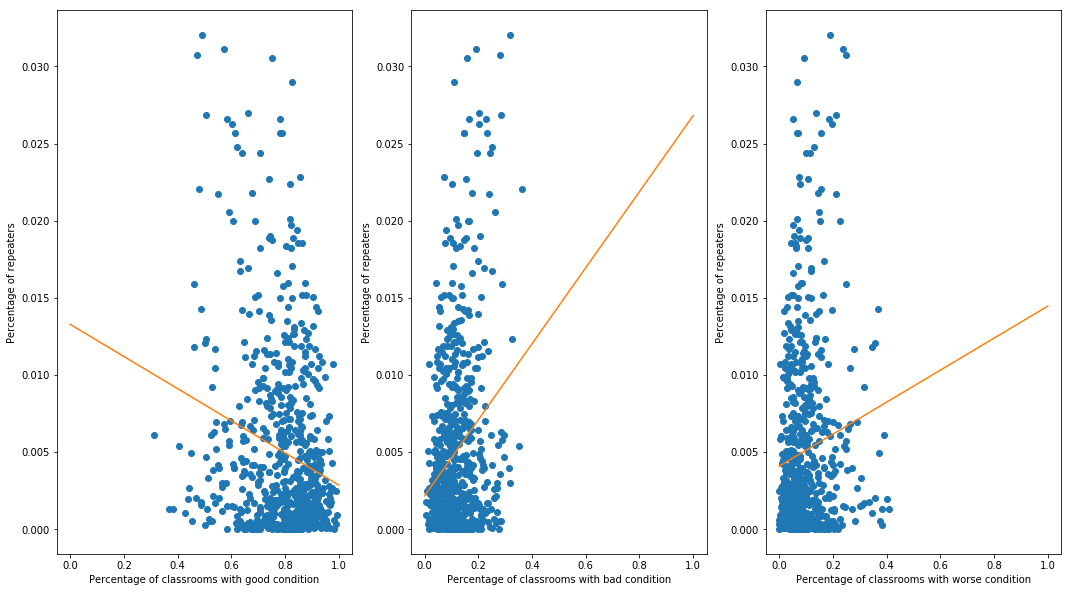

In [34]:
plt.figure(figsize=(18, 10))

plt.subplot(131)
plt.xlabel("Percentage of classrooms with good condition")
plt.ylabel("Percentage of repeaters")
plt.plot(crg_rate, rep_rate, "o")

a1, b1, r1, p1, std_err1 = stats.linregress(crg_rate, rep_rate)
def model1(x):
    return a1 * x + b1

plt.plot([0.0, 1.0], [model1(0.0), model1(1.0)])

print("Good classroom vs repeaters")
print("a =", a1)
print("b =", b1)
print("R^2 =", r1 ** 2)
print("p-value =", p1)
print("std. error =", std_err1)
print()

plt.subplot(132)
plt.xlabel("Percentage of classrooms with bad condition")
plt.ylabel("Percentage of repeaters")
plt.plot(crb_rate, rep_rate, "o")

a2, b2, r2, p2, std_err2 = stats.linregress(crb_rate, rep_rate)
def model2(x):
    return a2 * x + b2

plt.plot([0.0, 1.0], [model2(0.0), model2(1.0)])

print("Bad classroom vs repeat rate")
print("a =", a2)
print("b =", b2)
print("R^2 =", r2 ** 2)
print("p-value =", p2)
print("std. error =", std_err2)
print()

plt.subplot(133)
plt.xlabel("Percentage of classrooms with worse condition")
plt.ylabel("Percentage of repeaters")
plt.plot(crw_rate, rep_rate, "o")

# linear regression
print("Worse classroom vs repeaters")
a3, b3, r3, p3, std_err3 = stats.linregress(crw_rate, rep_rate)
def model3(x):
    return a3 * x + b3

plt.plot([0.0, 1.0], [model3(0.0), model3(1.0)])

print("a =", a3)
print("b =", b3)
print("R^2 =", r3 ** 2)
print("p-value =", p3)
print("std. error =", std_err3)